Image Information:
Original image shape: (512, 512, 3)
Cartoon image shape: (512, 512, 3)


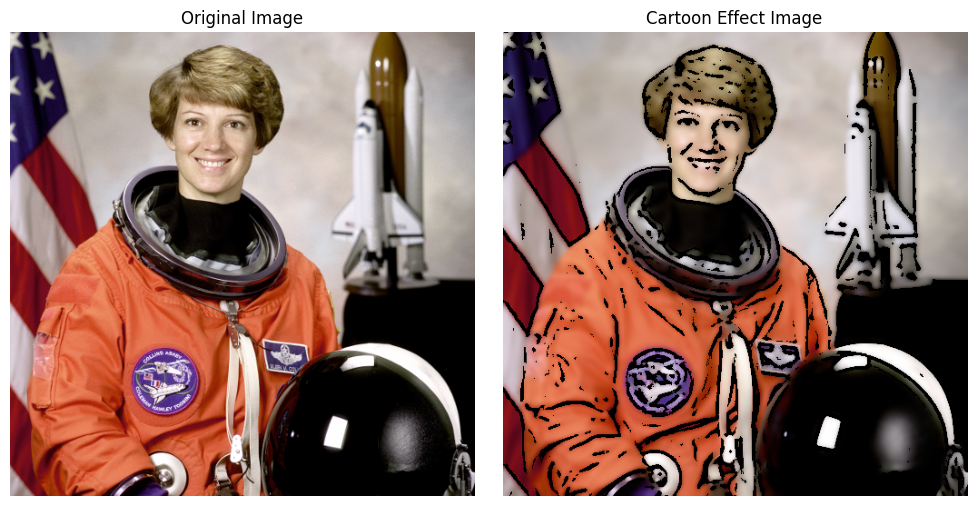

In [6]:
import cv2
import numpy as np
from skimage import data, img_as_ubyte
import matplotlib.pyplot as plt

# Load a sample image from skimage
image = img_as_ubyte(data.astronaut())

# Convert to RGB if needed (skimage loads in RGB already)
original_image = image.copy()

# Convert to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Apply median blur to reduce noise
gray_blur = cv2.medianBlur(gray, 5)

# Detect edges using adaptive thresholding
edges = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 9, 9)

# Apply bilateral filter to get smooth color regions
color = cv2.bilateralFilter(original_image, 9, 250, 250)

# Combine color image with edges
cartoon_image = cv2.bitwise_and(color, color, mask=edges)

print("Image Information:")
print(f"Original image shape: {original_image.shape}")
print(f"Cartoon image shape: {cartoon_image.shape}")

# Display original and cartoon images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(original_image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cartoon_image)
ax[1].set_title("Cartoon Effect Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()